# HxGN Content Program, 30cm (Download) Block

This block provides RGB+NIR imagery with 30 cm GSD in GeoTIFF format across the entire US, Europe and parts of Canada.

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/a0766df2-6cdd-42d8-b74a-3ba160dcdb43).

In [4]:
import up42

In [5]:
up42.authenticate(project_id="1234", project_api_key="1234")
project = up42.initialize_project()

# Construct workflow
workflow = project.create_workflow(name="HxGN Content Program, 30cm (Download) Block - Data Access Example", use_existing=True)
#print(up42.get_blocks(basic=True))
input_tasks = ["HxGN Content Program, 30 cm (Download)"]
workflow.add_workflow_tasks(input_tasks)

2021-03-11 15:49:56,953 - Authentication with UP42 successful!
2021-03-11 15:49:57,711 - Initialized Project(name: HxGN SDK, project_id: 8518b4b3-25be-487e-9d58-e9d564cea3cb, description: , createdAt: 2021-03-11T11:39:26.711933Z)
2021-03-11 15:49:57,712 - Getting existing workflows in project ...
2021-03-11 15:49:58,090 - Got 1 workflows for project 8518b4b3-25be-487e-9d58-e9d564cea3cb.
100%|██████████| 1/1 [00:00<00:00,  2.53it/s]
2021-03-11 15:49:58,508 - Using existing workflow: HxGN Content Program, 30cm (Download) Block - Data Access Example - 06a07e2f-b735-4cb8-b7cf-cc93704d63e9
2021-03-11 15:50:02,194 - Added tasks to workflow: [{'name': 'hexagon-aerial-30cm-download:1', 'parentName': None, 'blockId': 'a0766df2-6cdd-42d8-b74a-3ba160dcdb43'}]


In [7]:
# Define the aoi and input parameters of the workflow to run it.
aoi = [13.375966, 52.515068, 13.378314, 52.516639]

# Or use up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation="bbox",
                                                 limit=1)

2021-03-11 15:55:06,073 - Estimated: 17-17 Credits, Duration: 0-0 min.
2021-03-11 15:55:06,074 - +++++++++++++++++++++++++++++++++
2021-03-11 15:55:06,075 - Running this job as Test Query...
2021-03-11 15:55:06,075 - +++++++++++++++++++++++++++++++++
2021-03-11 15:55:06,076 - Selected input_parameters: {'hexagon-aerial-30cm-download:1': {'zoom_level': 19, 'limit': 1, 'bbox': [13.375966, 52.515068, 13.378314, 52.516639]}, 'config': {'mode': 'DRY_RUN'}}
2021-03-11 15:55:07,132 - Created and running new job: 8388983c-3101-4fc6-91d6-10faf6000bc1.
2021-03-11 15:55:07,536 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 15:55:34,856 - Job finished successfully! - 8388983c-3101-4fc6-91d6-10faf6000bc1
2021-03-11 15:55:39,859 - Selected input_parameters: {'hexagon-aerial-30cm-download:1': {'zoom_level': 19, 'limit': 1, 'bbox': [13.375966, 52.515068, 13.378314, 52.516639]}}
2021-03-11 15:55:43,098 - Created and running new job: 1cd276db-0dd9-448b-ac71-5b676f6b016d.
20

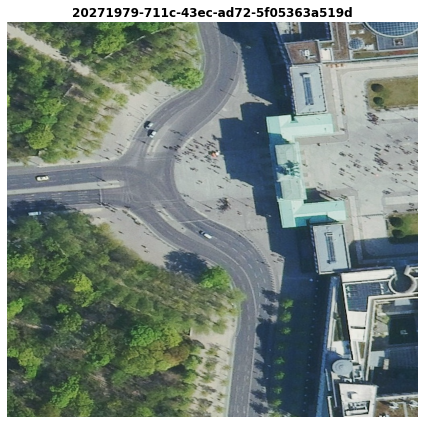

In [8]:
# Price estimation
workflow.estimate_job(input_parameters)

# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

job.download_results()
job.plot_results(figsize=(6,6))